<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Jhon Corredor Franco.
<br>
<i><b>Asignatura:</b></i> Métricas de rendimiento HPC
<br>
<i><b>Estudiante 1:</b></i> Juan Carlos Tarazona Contreras.
<br>
<i><b>Estudiante 2:</b></i> Nestor Morales.
<br>
<i><b>Tema:</b></i> Primer Parcial. Análisis exploratorio de datos.
<br>
<br>
10/09/2022
<br>
</FONT>
</div>

# Modelo **03**

### Descripción de Valores:

    Age: continuo.
    Bodymass: continuo.
    Height: continuo.
    Education: 11th, HS-grad, Assoc-acdm, Some-college, 10th, Prof-school, 7th-8th, 9th, 
               12th, Bachelors, Masters, Doctorate, 5th-6th, Assoc-voc, 1st-4th, Preschool.
    Martial_Status: Never-married, Married-civ-spouse, Widowed, Divorced,
                    Separated, Married-spouse-absent, Married-AF-spouse.
    Occupation: Machine-op-inspct, Farming-fishing, Protective-serv, Other-service, Sales, 
                Prof-specialty, Craft-repair, Adm-clerical, Exec-managerial, Armed-Forces,
                Tech-support,  Priv-house-serv, Transport-moving, Handlers-cleaners.
    Race: Black, White, Asian-Pac-Islander, Other, Amer-Indian-Eskimo.
    Sex: Male, Female.
    Hours_per_week: tiempo en horas.
    Country: United-States, Peru, Guatemala, Mexico, Dominican-Republic,
             Ireland, Germany, Philippines, Thailand, Haiti, El-Salvador,
             Puerto-Rico, Vietnam, South, Columbia, Japan, India, Laos, 
             Cambodia, Poland, England, Cuba, Taiwan, Italy, Portugal,
             Canada, China, Nicaragua, Honduras, Iran, Yugoslavi, Greece,
             Scotland, Jamaica, Ecuador,  Hungary, Hong, Trinadad&Tobago,
             Outlying-US(Guam-USVI-etc), France.
    Target: <=50K, >50K.

## 0.- Bibliotecas y Lectura

In [273]:
# Se importan las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.reshape.reshape import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

import seaborn as sns

In [274]:
# Se importa el dataframe el dataset indiceMasaCorporal.csv
df = pd.read_csv("/content/indiceMasaCorporal.csv")

In [275]:
# Se muestra la información de dataset
df.head()

,Age,Bodymass,Height,Education,Martial_Status,Occupation,Race,Sex,Hours_per_week,Country,Target
0,|1x3 Cross validator,112.82,175.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,78.81,160.96,11th,Never-married,Machine-op-inspct,Black,Male,40.0,United-States,<=50K.
2,38,82.35,148.96,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50.0,United-States,<=50K.
3,28,46.30,149.62,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40.0,United-States,>50K.
4,44,107.85,146.28,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40.0,United-States,>50K.


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16282 non-null  object 
 1   Bodymass        16282 non-null  float64
 2   Height          16282 non-null  float64
 3   Education       16281 non-null  object 
 4   Martial_Status  16281 non-null  object 
 5   Occupation      15315 non-null  object 
 6   Race            16281 non-null  object 
 7   Sex             16281 non-null  object 
 8   Hours_per_week  16281 non-null  float64
 9   Country         16007 non-null  object 
 10  Target          16281 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.4+ MB


**Se crea una copia de los datos del csv**

* se una division de la informacion con un tamano de 45, separandola en test y en train, se realiza el analisis sobre la participacion de test.

In [277]:
train, test = train_test_split(df, test_size=0.45, random_state=45)
dt_prueba = test.copy()
cantidad = len(dt_prueba)
print('la catidad de datos del dataframe de pruebas',cantidad,'\n ')


print('Se evidencia la sumatoria de los siguientes de datos de null o NAN: \n',dt_prueba.isnull().sum())

la catidad de datos del dataframe de pruebas 7327 
 
Se evidencia la sumatoria de los siguientes de datos de null o NAN: 
 Age                 0
Bodymass            0
Height              0
Education           1
Martial_Status      1
Occupation        437
Race                1
Sex                 1
Hours_per_week      1
Country           126
Target              1
dtype: int64


## 1.- Limpieza de los datos ( NaN)
    - Bonus: ¿Cuantas Filas se han eliminado después de la limpieza?



**se realiza la ejecucion del funcion isnull().suma(), para identificar la 
cantidad de NaN o datos nulos que hay en la información suministrada**

In [278]:
# Se procede a eliminar los valores desaparecidos
dt_prueba.dropna(inplace=True)
print('Se evidencia la sumatoria de los siguientes de datos de null o NAN: \n',dt_prueba.isnull().sum())
# Se obtiene información general from pandas.core.reshape.reshape import get_dummies de los dataframes
limpieza = len(dt_prueba)
Final = cantidad - limpieza
print(limpieza)

Se evidencia la sumatoria de los siguientes de datos de null o NAN: 
 Age               0
Bodymass          0
Height            0
Education         0
Martial_Status    0
Occupation        0
Race              0
Sex               0
Hours_per_week    0
Country           0
Target            0
dtype: int64
6775


In [279]:
print('CONCULUSIONES')
print('*   Se evidencia que en la data inicial \n    se tenian una cantidad de', cantidad,' datos incuyendo los NaN.')
print('*   Despues de hacer la limpieza de datos NaN se evidencia que queda ',Final,'\n    datos limpios, significa que se borraron',limpieza,'del dataframe de test')
print('*   Se presentan datos del tipo *float64* y *object*, es decir, datos numéricos con decimales y categóricos')
print('*   Se presentó en el dt_prueba datos desaparecidos, se toma la decisión de eliminar los datos NaN')


CONCULUSIONES
*   Se evidencia que en la data inicial 
    se tenian una cantidad de 7327  datos incuyendo los NaN.
*   Despues de hacer la limpieza de datos NaN se evidencia que queda  552 
    datos limpios, significa que se borraron 6775 del dataframe de test
*   Se presentan datos del tipo *float64* y *object*, es decir, datos numéricos con decimales y categóricos
*   Se presentó en el dt_prueba datos desaparecidos, se toma la decisión de eliminar los datos NaN


**se actualizó la columna de 'Sex' y se le borra los espacios dentro de la informacion.**

In [280]:
dt_prueba['Sex']= dt_prueba['Sex'].str.replace(' ','')

* se realiza la eliminación de espacios en la columna 'Sex' para asi poder hacer mucho más fáciles la consulta, ya que estos espacios estaban generando errores en las consultas.

In [309]:
# Se convierte en float los datos de la columna 'Age' para poder dejar al
dt_prueba['Age'] = dt_prueba['Age'].astype(float)
dt_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6775 entries, 2267 to 1470
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             6775 non-null   float64
 1   Bodymass        6775 non-null   float64
 2   Height          6775 non-null   float64
 3   % BMI           6775 non-null   float64
 4   Education       6775 non-null   object 
 5   Martial_Status  6775 non-null   object 
 6   Occupation      6775 non-null   object 
 7   Race            6775 non-null   object 
 8   Sex             6775 non-null   object 
 9   Hours_per_week  6775 non-null   float64
 10  Country         6775 non-null   object 
 11  Target          6775 non-null   object 
dtypes: float64(5), object(7)
memory usage: 946.1+ KB


## 2.- Insertar columna que presente el Indice de Masa Corporal después de la columna 'height'
[Enlace BMI](https://www.calculator.net/bmi-calculator.html)

 $BMI = kg/(m^2)$

<img src="./img/graff003.png">

In [282]:
# Se hace revisión sobre los datos numéricos del df data
atributos_numericos = dt_prueba.select_dtypes(include=['float64'])
print(atributos_numericos)

        Age  Bodymass  Height  Hours_per_week
2267   41.0     98.92  187.77            40.0
3636   23.0     51.55  172.68            44.0
6746   42.0     84.41  132.04            40.0
906    41.0     69.77  160.12            60.0
4954   19.0     88.59  174.39            40.0
...     ...       ...     ...             ...
7828   26.0     74.92  144.85            48.0
8297   42.0     62.70  164.79            65.0
14175  46.0     87.59  156.46            40.0
4895   37.0     94.74  135.68            40.0
1470   40.0     54.09  133.64            40.0

[6775 rows x 4 columns]


*Se agrega a la data la columna de bmi con el indice de masa corporal al dataframe 
* se utiliza la formula de bmi para hacer dicho calculo


In [283]:
#se convierte de centimetros a metros la columna de altura
dt_prueba[["Height"]] = dt_prueba[["Height"]]/100
#dt_prueba.drop(['% BMI'], axis=1, inplace=True)
dt_prueba.insert(loc = 3, 
          column = '% BMI', 
          value = (dt_prueba['Bodymass']/(dt_prueba['Height']*dt_prueba['Height'])))



In [284]:
# se muestra la informacion de años 'Age','Bodymass','Height','% BMI', para el resultado de lamasa corporal
dt_prueba[['Age','Bodymass','Height','% BMI']]

,Age,Bodymass,Height,% BMI
2267,41.0,98.92,1.8777,28.056384
3636,23.0,51.55,1.7268,17.287993
6746,42.0,84.41,1.3204,48.415327
906,41.0,69.77,1.6012,27.213071
4954,19.0,88.59,1.7439,29.130071
...,...,...,...,...
7828,26.0,74.92,1.4485,35.707609
8297,42.0,62.70,1.6479,23.089038
14175,46.0,87.59,1.5646,35.780621
4895,37.0,94.74,1.3568,51.463783


## 3.- ¿Cuantos hombres y mujeres presentan BMI normal?

    *------------------*------------*
    |   Categoría      |  Rango BMI |
    *------------------*------------*
    | Delgadez severa  |    < 16    |
    | Delgadez moderada|  16 - 17   |
    | Delgadez leve    |  17 - 18,5 |
    | Normal           |  18.5 - 25 |
    | Sobrepeso        |  25 - 30   |
    | Obesos Clase I   |  30 - 35   |
    | Obesos Clase II  |  35 - 40   |
    | Obesos Clase III |    > 40    |
    *------------------*------------*

In [285]:
normal_mujeres = dt_prueba[(dt_prueba['% BMI'] >= 18.5) & (dt_prueba['% BMI']<=25)  & (dt_prueba['Sex']=='Female') ]['% BMI'].count()
normal_hombres = dt_prueba[(dt_prueba['% BMI'] >= 18.5) & (dt_prueba['% BMI']<=25)  & (dt_prueba['Sex']=='Male') ]['% BMI'].count()
print('las mujeres con Normal|18.5 - 25 son:',normal_mujeres,'los hombres con con Normal|18.5 - 25 son:',normal_hombres)


las mujeres con Normal|18.5 - 25 son: 456 los hombres con con Normal|18.5 - 25 son: 967


In [286]:
dt_prueba[(dt_prueba['% BMI'] >= 18.5) & (dt_prueba['% BMI']<=25)]['% BMI'].count()

1423

* se evidencia que hay 3.164 personas entre hombre y mujeres, con un indice de mas corporal normal 

## 4.-¿Cuantos hombres y mujeres presentan BMI obesos clase 3?


In [287]:
clase3_mujeres = dt_prueba[(dt_prueba['% BMI'] >= 40) & (dt_prueba['Sex']=='Female')]['% BMI'].count()
clase3_hombres = dt_prueba[(dt_prueba['% BMI'] >= 40) & (dt_prueba['Sex']=='Male')]['% BMI'].count()

print('las mujeres con BMI Obesos Clase II |35 - 40 son:',clase3_mujeres,'los hombres con BMI Obesos Clase II |35 - 40 son:',clase3_hombres)


las mujeres con BMI Obesos Clase II |35 - 40 son: 483 los hombres con BMI Obesos Clase II |35 - 40 son: 955


In [288]:
dt_prueba[dt_prueba['% BMI'] >= 40]['% BMI'].count()

1438

* Se evidencia que hay 3279 personas que tienen un indice de masa corporal "obsesos clase III"

## 5.- ¿Cual es la edad promedio de las mujeres en el DataFrame?

In [289]:
promedio_mujeres = dt_prueba[dt_prueba['Sex']=='Female']['Age'].mean()
print("La edad promedio de las mujeres:{",promedio_mujeres,"}" )

La edad promedio de las mujeres:{ 36.96880733944954 }


*La edad promedio de las mujeres esta entre los 37.1864

## 6.-  ¿Es verdad que las personas del DataFrame del pais ' United-States', en promedio se encuentran en 'Sobre Peso'?
      - Bonus -->  ¿En que categoria 'BMI' se encuentran en promedio por 'Sex' las personas del DataFrame?
    *------------------*------------*
    |   Categoría      |  Rango BMI |
    *------------------*------------*
    | Delgadez severa  |    < 16    |
    | Delgadez moderada|  16 - 17   |
    | Delgadez leve    |  17 - 18,5 |
    | Normal           |  18.5 - 25 |
    | Sobrepeso        |  25 - 30   |
    | Obesos Clase I   |  30 - 35   |
    | Obesos Clase II  |  35 - 40   |
    | Obesos Clase III |    > 40    |
    *------------------*------------*

In [290]:
prd_US = dt_prueba[dt_prueba['Country']==' United-States']['% BMI'].mean()
prod_Male = dt_prueba[dt_prueba['Sex']=='Male']['% BMI'].mean()
prod_famale = dt_prueba[dt_prueba['Sex']=='Female']['% BMI'].mean()
print("Las personas de 'United-States', en promedio se encuentran:{",prd_US,"}, para los hombres en promedio se encuentran:{",prod_Male,"},para las mujeres en promedio se encuentran:",prod_famale)

Las personas de 'United-States', en promedio se encuentran:{ 31.492274583742358 }, para los hombres en promedio se encuentran:{ 31.33846933156394 },para las mujeres en promedio se encuentran: 31.81836982175123



1.   Las personas de 'United-States', en promedio se encuentran en un
indice de masa corporal de 31.666, que equivale a estar una categoria de Obesos Clase I
2.   Para los hombres en promedio se encuentran en un indici de masa corporal con un indece de 31.5643, segun este dato se encuentran en un idice nivel 'Clase obeso I'
3. Para los mujeres en promedio se encuentran en un indice de masa corporal con un indece de 31.5643, segun este dato se encuentran en un idice nivel 'Clase obeso I'



## 7.-  ¿Cuál es el promedio de la masa corporal del país ‘Colombia’? 

In [291]:
prd_COL = dt_prueba[dt_prueba['Country']==' Columbia']['Bodymass'].mean()
print("Las personas de Colombia tienen un promedio de masa corporal de", prd_COL)

Las personas de Colombia tienen un promedio de masa corporal de 84.90181818181817




*   Las personas de Colombia tienen un promedio de masa corporal de 82.72576923076923




## 8.- ¿Cuál es la categoría BMI que presenta el país ‘Colombia’ en promedio?
      
    *------------------*------------*
    |   Categoría      |  Rango BMI |
    *------------------*------------*
    | Delgadez severa  |    < 16    |
    | Delgadez moderada|  16 - 17   |
    | Delgadez leve    |  17 - 18,5 |
    | Normal           |  18.5 - 25 |
    | Sobrepeso        |  25 - 30   |
    | Obesos Clase I   |  30 - 35   |
    | Obesos Clase II  |  35 - 40   |
    | Obesos Clase III |    > 40    |
    *------------------*------------*

In [292]:
prd_COL = dt_prueba[dt_prueba['Country']==' Columbia']['% BMI'].mean()
print("Las personas de Colombia tienen un promedio de % BMI corporal de", prd_COL)

Las personas de Colombia tienen un promedio de % BMI corporal de 35.16173430690089


Según la anterior tabla con el promedio de masa corporal de 34.33, se deduce que la categoría que representa el BMI de Colombia es "Obesos Clase I"

## 9.- Calcule el promedio y la desviación estandar de la edad, en las siguentes categorias ['BMI']:
        - La edad promedio y su desviación de categoría Delgadez Severa: {mean} +- {std} años.
        - La edad promedio y su desviación de categoría Obesos Clase II: {mean} +- {std} años.
        - La edad promedio y su desviación de categoría Obesos Clase III: {mean} +- {std} años.

la edad promedio es: 39.95751633986928 la desvicion estandar es: 13.521379272018256 de categoría Delgadez Severa

 --------------------------------------------------------------------------------------------------------------------


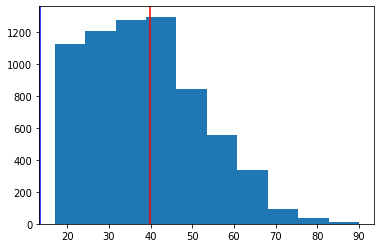

In [293]:
# - La edad promedio y su desviación de categoría Delgadez Severa: {mean} +- {std} años.

edad_promedio_Delgadez = dt_prueba[dt_prueba['% BMI'] < 16]['Age'].mean()
desviacion_estandar_Delgadez = dt_prueba[dt_prueba['% BMI'] < 16]['Age'].std()
print("la edad promedio es:",edad_promedio_Delgadez,"la desvicion estandar es:",desviacion_estandar_Delgadez,"de categoría Delgadez Severa")
print("\n --------------------------------------------------------------------------------------------------------------------")
plt.hist(dt_prueba['Age'])
plt.axvline(edad_promedio_Delgadez,color='red')
plt.axvline(desviacion_estandar_Delgadez,color='blue')

la edad promedio es: 39.63930348258707 la desvicion estandar es: 13.377803497337954 de categoría obesidad clase II

 --------------------------------------------------------------------------------------------------------------------


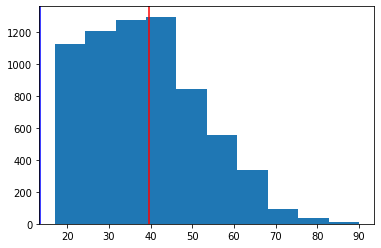

In [294]:
# - La edad promedio y su desviación de categoría Obesos Clase II: {mean} +- {std} años.
edad_promedio_Clase_II = dt_prueba[(dt_prueba['% BMI'] >= 35) & (dt_prueba['% BMI']<=40)]['Age'].mean()
desviacion_estandar_Clase_II = dt_prueba[(dt_prueba['% BMI'] >= 35) & (dt_prueba['% BMI']<=40)]['Age'].std()
print("la edad promedio es:",edad_promedio_Clase_II,"la desvicion estandar es:",desviacion_estandar_Clase_II,"de categoría obesidad clase II")
print("\n --------------------------------------------------------------------------------------------------------------------")
plt.hist(dt_prueba['Age'])
plt.axvline(edad_promedio_Clase_II,color='red')
plt.axvline(desviacion_estandar_Clase_II,color='blue')

la edad promedio es: 38.508344923504865 la desvicion estandar es: 13.198432032433454 de categoría obesidad clase III

 --------------------------------------------------------------------------------------------------------------------


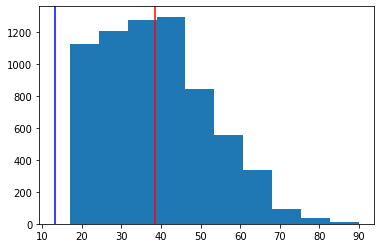

In [295]:
# - La edad promedio y su desviación de categoría Obesos Clase III: {mean} +- {std} años.

edad_promedio_Clase_III = dt_prueba[dt_prueba['% BMI'] > 40]['Age'].mean()
desviacion_estandar_Clase_III = dt_prueba[dt_prueba['% BMI'] > 40]['Age'].std()
print("la edad promedio es:",edad_promedio_Clase_III,"la desvicion estandar es:",desviacion_estandar_Clase_III,"de categoría obesidad clase III")
print("\n --------------------------------------------------------------------------------------------------------------------")
plt.hist(dt_prueba['Age'])
plt.axvline(edad_promedio_Clase_III,color='red')
plt.axvline(desviacion_estandar_Clase_III,color='blue')

## 10.- De las personas de más edad en el Dataframe:
    - ¿Cuantas mujeres aparecen, que grado de educación y que estado civil tienen? 
    - ¿Es cierto que son todas del pais 'United-States'?

**Edad promedio de toda la data_prueba**

In [296]:
dt_prueba['Age'].mean()

38.73608856088561

**10.1.- ¿Cuántas mujeres aparecen, que grado de educación y que estado civil tienen?**

In [297]:
# se muestra las edades mayores al promedio de la edad
cantidad_mayores = dt_prueba[(dt_prueba['Age'] > 38) & (dt_prueba['Sex']=='Female')]['Sex'].count()
print('la cantidad de gente mayor a la edad media es :\n',cantidad_mayores)
ocupacion = pd.unique(dt_prueba[(dt_prueba['Age'] > 38) & (dt_prueba['Sex']=='Female')]['Occupation'])
estado_civil = pd.unique(dt_prueba[(dt_prueba['Age'] >= 38) & (dt_prueba['Sex']=='Female')]['Martial_Status'])
country = pd.unique(dt_prueba[(dt_prueba['Age'] > 38) & (dt_prueba['Sex']=='Female')]['Country'])
print('--------------------------------------------------------------------')
print('Las Ocupaciones son: ',ocupacion)
print('--------------------------------------------------------------------')
print('El estado civil son: ',estado_civil)
print('--------------------------------------------------------------------')
print('Las ciudades son: ',country)
print('--------------------------------------------------------------------')

la cantidad de gente mayor a la edad media es :
 894
--------------------------------------------------------------------
Las Ocupaciones son:  [' Adm-clerical' ' Other-service' ' Prof-specialty' ' Sales'
 ' Exec-managerial' ' Machine-op-inspct' ' Farming-fishing'
 ' Priv-house-serv' ' Tech-support' ' Craft-repair' ' Handlers-cleaners'
 ' Transport-moving' ' Protective-serv']
--------------------------------------------------------------------
El estado civil son:  [' Married-civ-spouse' ' Divorced' ' Widowed' ' Separated'
 ' Never-married' ' Married-spouse-absent']
--------------------------------------------------------------------
Las ciudades son:  [' Italy' ' United-States' ' Cuba' ' Columbia' ' Yugoslavia' ' Jamaica'
 ' Mexico' ' China' ' El-Salvador' ' Philippines' ' Germany'
 ' Puerto-Rico' ' Poland' ' Dominican-Republic' ' Ecuador' ' Haiti'
 ' Outlying-US(Guam-USVI-etc)' ' Canada' ' India' ' England' ' Scotland'
 ' Thailand' ' Nicaragua' ' Vietnam' ' Japan' ' Honduras']
------

  * Se encuentran '2047' mujeres mayores de la media de los 'Age' 

In [298]:
cantidad_60 = dt_prueba[(dt_prueba['Age'] > 60) & (dt_prueba['Sex']=='Female')]['Sex'].count()
print('la catidad de gente mayores de la edad de 60 es :',cantidad_60)
Ocupacion = pd.unique(dt_prueba[(dt_prueba['Age'] >= 60) & (dt_prueba['Sex']=='Female')]['Occupation'])
estado_civil = pd.unique(dt_prueba[(dt_prueba['Age'] >= 60) & (dt_prueba['Sex']=='Female')]['Martial_Status'])
ciudad = pd.unique(dt_prueba[(dt_prueba['Age'] >= 60) & (dt_prueba['Sex']=='Female') & (dt_prueba['Country']!= '')]['Country'])

print('--------------------------------------------------------------------')
print('Las Ocupaciones son: ',Ocupacion)
print('--------------------------------------------------------------------')
print('El estado civil son: ',estado_civil)
print('--------------------------------------------------------------------')
print('Las ciudades son: ',country)
print('--------------------------------------------------------------------')




la catidad de gente mayores de la edad de 60 es : 155
--------------------------------------------------------------------
Las Ocupaciones son:  [' Sales' ' Other-service' ' Adm-clerical' ' Exec-managerial'
 ' Priv-house-serv' ' Prof-specialty' ' Craft-repair' ' Tech-support'
 ' Handlers-cleaners' ' Machine-op-inspct' ' Transport-moving'
 ' Protective-serv']
--------------------------------------------------------------------
El estado civil son:  [' Widowed' ' Divorced' ' Never-married' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Separated']
--------------------------------------------------------------------
Las ciudades son:  [' Italy' ' United-States' ' Cuba' ' Columbia' ' Yugoslavia' ' Jamaica'
 ' Mexico' ' China' ' El-Salvador' ' Philippines' ' Germany'
 ' Puerto-Rico' ' Poland' ' Dominican-Republic' ' Ecuador' ' Haiti'
 ' Outlying-US(Guam-USVI-etc)' ' Canada' ' India' ' England' ' Scotland'
 ' Thailand' ' Nicaragua' ' Vietnam' ' Japan' ' Honduras']
------------------------


  * Se encuentran '388' mujeres mayores de 60 años 
  la catidad de gente mayores de la edad de 60 es : 345
  * se evidencia en los dos casos que no todas las mujeres son de ' United-States'


## 11.- Grafique la Edad por Ocupación (por Genero)
    --> BONUS: Mencione al menos 3 (tres) observaciones obtenidas de la gráfica

In [299]:
dt_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6775 entries, 2267 to 1470
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             6775 non-null   float64
 1   Bodymass        6775 non-null   float64
 2   Height          6775 non-null   float64
 3   % BMI           6775 non-null   float64
 4   Education       6775 non-null   object 
 5   Martial_Status  6775 non-null   object 
 6   Occupation      6775 non-null   object 
 7   Race            6775 non-null   object 
 8   Sex             6775 non-null   object 
 9   Hours_per_week  6775 non-null   float64
 10  Country         6775 non-null   object 
 11  Target          6775 non-null   object 
dtypes: float64(5), object(7)
memory usage: 688.1+ KB


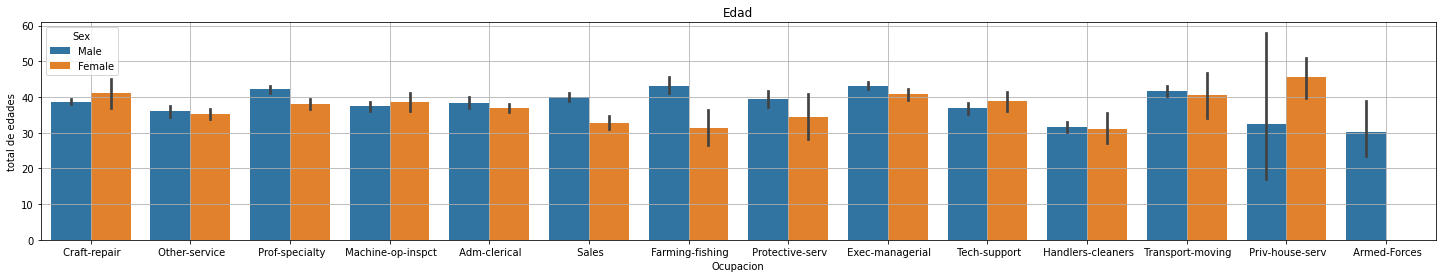

In [300]:
ax = sns.barplot(data=dt_prueba,x=dt_prueba['Occupation'],y=dt_prueba['Age'], hue=dt_prueba['Sex'])
ax.figure.set_size_inches(25,4)
ax.set_title('Edad')
ax.set_xlabel('Ocupacion')
ax.set_ylabel('total de edades')
plt.grid()

In [301]:
#df.groupby(["Occupation"]).hist()
# Se hace revisión sobre los datos categóricos del df test
atributos_categoricos_test = dt_prueba.select_dtypes(include=['object'])
print(atributos_categoricos_test.columns)


Index(['Education', 'Martial_Status', 'Occupation', 'Race', 'Sex', 'Country',
       'Target'],
      dtype='object')


## 12.-  Describa al menos 5 conclusiones sobre la gráfica del punto 11.

* según la tabla se puede evidenciar que en la mayoría de ocupaciones hay más hombres que mujeres, siendo esto en 8 ocupaciones en las 14 totales.
* Se nota que tanto en hombres como en mujeres, el límite de edad de trabajadores esta en el rango de 30 a 40 años.
* Se observa que en la ocupación 'Armed-Forces' o fuerzas armadas solo hay hombres.
* Los hombres pertenecientes a las fuerzas armadas son los trabajadores de menor edad.
* Las mujeres pertenecientes a 'Priv-house-serv' o servicio de privado de casas son, tanto en hombres como en mujeres, los trabajadores con mayor edad.

## 13 - ¿Es cierto que las personas que reciben más de 50k ['Target'] tienen al menos educación secundaria?

In [302]:
# personas que reciven mas de 50k 
cantidad_mayores = dt_prueba[(dt_prueba['Target']==' >50K.')]['Education'].count()
print('la cantidad de personas que reciben mas de 50k es :\n',cantidad_mayores)
education = pd.unique(dt_prueba[(dt_prueba['Target']==' >50K.')]['Education'])
print('--------------------------------------------------------------------')
print('Las Educacion de las personas que reciven mas de  50k son: ',education)
print('--------------------------------------------------------------------')


la cantidad de personas que reciben mas de 50k es :
 1708
--------------------------------------------------------------------
Las Educacion de las personas que reciven mas de  50k son:  [' Some-college' ' Prof-school' ' HS-grad' ' Bachelors' ' Doctorate'
 ' Masters' ' Assoc-voc' ' Assoc-acdm' ' 5th-6th' ' 7th-8th' ' 11th'
 ' 10th' ' 9th' ' 12th' ' Preschool']
--------------------------------------------------------------------


* segun lo estudiado en la consulta se evidencia que es falso ya que en las personas que tienen un 'Target' mas de 50k, alugnos de ellos tienen educacion de: '5th-6th',' 7th-8th',' 11th',' 10th',' 9th',' 12th' '

## 14.- ¿Cuál es el promedio, desviación, el valor máximo y mínimo en el dataset?

In [303]:
dt_prueba.describe()

,Age,Bodymass,Height,% BMI,Hours_per_week
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,38.736089,79.862982,1.621451,31.492887,40.936384
std,13.443526,20.316225,0.176436,10.736101,12.163617
min,17.000000,45.000000,1.320200,12.220370,1.000000
25%,28.000000,62.390000,1.466600,23.301500,40.000000
50%,37.000000,79.640000,1.622800,30.135002,40.000000
75%,48.000000,97.255000,1.772450,38.265453,45.000000
max,90.000000,115.990000,1.929900,66.247723,99.000000


## 15.- ¿Cuál es la proporción Doctorate del país Colombia en el dataset? 

In [304]:
num_doc = dt_prueba[(dt_prueba['Education'] == ' Doctorate') &(dt_prueba['Country']== ' Columbia')]['Education'].count()
porcentaje=(num_doc)/len(dt_prueba)*100
print(porcentaje)

0.0


In [305]:
pais = pd.unique(df[(df['Education'] == ' Doctorate')]['Country'])

#dt_prueba[(dt_prueba['Education'] == ' Doctorate') &(dt_prueba['Country']== ' Columbia')].count()

## 16.- ¿Cuál es la proporción Doctorate del país US en el dataset?



In [306]:
num_doc = dt_prueba[(dt_prueba['Education'] == ' Doctorate') &(dt_prueba['Country']== ' United-States')]['Education'].count()
porcentaje=(num_doc)/len(dt_prueba)*100

print(porcentaje)


1.062730627306273
